# Nadiatus Salam
# PYTN-KS19-014
# Python for Data Science by Hacktiv8
# Assignment Python 1 - London Crime Dataset Visualization

## Business and Data Understanding

The aim of this projects is to introduce you to data visualization with Python as concrete
and as consistent as possible. Using what you’ve learned; download the London Crime
Dataset from Kaggle. This dataset is a record of crime in major metropolitan areas, such
as London, occurs in distinct patterns. This data covers the number of criminal reports
by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.


This dataset contains:
* lsoa_code: this represents a policing area
* borough: the london borough for which the statistic is related
* major_category: the major crime category
* minor_category: the minor crime category
* value: the count of the crime for that particular borough, in that particular month
* year: the year of the summary statistic
* month: the month of the summary statistic

Formulate a question and derive a statistical hypothesis test to answer the question. You
have to demonstrate that you’re able to make decisions using data in a scientific
manner. And the important things, Visualized the data. Examples of questions can be:
* What is the change in the number of crime incidents from 2011 to 2016?
* What were the top 3 crimes per borough in 2016?

**Dataset Link** : https://www.kaggle.com/datasets/jboysen/london-crime

## Analytic Approach
Melakukan Data Visualization kepada dataset seperti `Line, Area, Scatter Plot, Box Plot,
Word Clouds, Folium Maps dan metode Visualization Plot`. 

## Import Library yang Dibutuhkan 

In [1]:
# Import library yang dibutuhkan
# Data cleaning and manipulation 
import pandas as pd
import numpy as np

# data visualization
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
from wordcloud import WordCloud


## Reading Dataset 

In [2]:
# Membaca dataset dengan library pandas
df_london = pd.read_csv("london_crime_by_lsoa.csv")

# Menampilkan 5 data teratas
df_london.head()

lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   

                minor_category  value  year  month  
0  Burglary in Other Buildings      0  2016     11  
1               Other violence      0  2016     11  
2               Other violence      0  2015      5  
3  Burglary in Other Buildings      0  2016      3  
4            Personal Property      0  2008      6

In [3]:
# Melihat jumlah baris dan kolom pada dataset
df_london.shape

(13490604, 7)

In [4]:
# Cara lain untuk melihat baris dan kolom
print("Baris : ", df_london.shape[0])
print("Kolom : ", df_london.shape[1])

Baris :  13490604
Kolom :  7


## Data Cleansing and Preparation

In [5]:
# Menampilkan 5 data teratas
df_london.head()

lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   

                minor_category  value  year  month  
0  Burglary in Other Buildings      0  2016     11  
1               Other violence      0  2016     11  
2               Other violence      0  2015      5  
3  Burglary in Other Buildings      0  2016      3  
4            Personal Property      0  2008      6

Dapat dilihat dari data di atas terdapat kolom `lsoa_code` yang berisi kode area kepolisian. **Data ini tidak diperlukan** dikarenakan sudah terdapat kolom `borough` yang dapat mewakili informasi dari nama kota yang ada di London. Sehingga kita dapat menghapus kolom `lsoa_code`.

In [6]:
# Menghapus kolom lsoa_code
df_london.drop('lsoa_code', axis=1, inplace=True)
# Menampilkan 5 data teratas terbaru
df_london.head()

borough               major_category               minor_category  \
0     Croydon                     Burglary  Burglary in Other Buildings   
1   Greenwich  Violence Against the Person               Other violence   
2     Bromley  Violence Against the Person               Other violence   
3   Redbridge                     Burglary  Burglary in Other Buildings   
4  Wandsworth                      Robbery            Personal Property   

   value  year  month  
0      0  2016     11  
1      0  2016     11  
2      0  2015      5  
3      0  2016      3  
4      0  2008      6

In [7]:
# Memeriksa jumlah missing value pada dataset
df_london.isnull().sum() 

borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [8]:
# Memeriksa tipe data pada dataset
df_london.dtypes

borough           object
major_category    object
minor_category    object
value              int64
year               int64
month              int64
dtype: object

In [9]:
# Nelihat informasi tipe data
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   borough         object
 1   major_category  object
 2   minor_category  object
 3   value           int64 
 4   year            int64 
 5   month           int64 
dtypes: int64(3), object(3)
memory usage: 617.6+ MB


### Data Visualization

#### **Area Plots**

Code Review : Mengimplementasikan `Area Plot` Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.

Analysis : Menarik Informasi/Kesimpulan Berdasarkan Area Plot Yang Telah Student Buat.

Output : Menunjukkan bagaimana tren kejahatan di 3 borough dengan jumlah kasus tertinggi dibandingkan dengan rata-rata kejahatan di Kota London menggunakan visualisasi area plots.

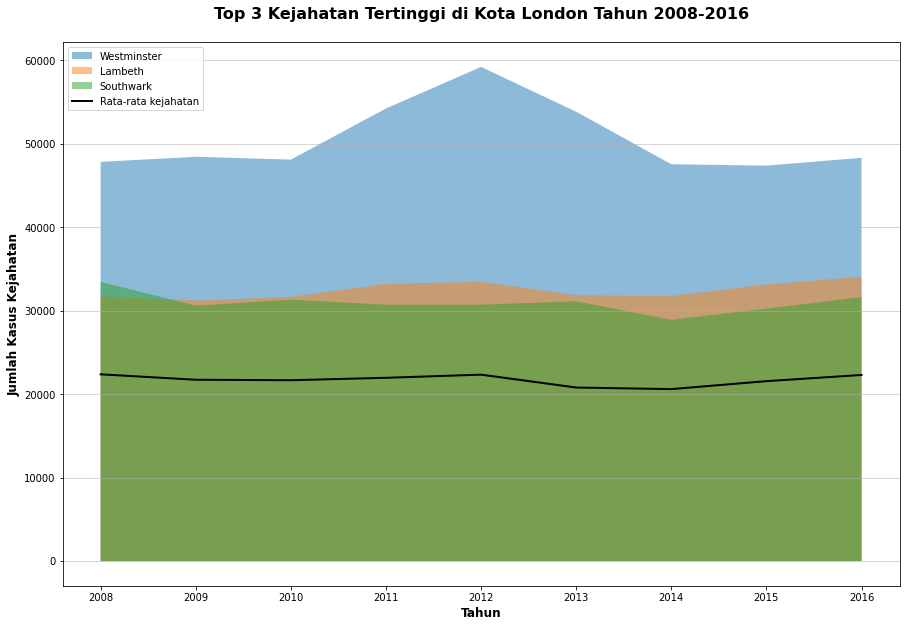

In [10]:
# Memfilter data untuk rentang waktu yang diinginkan
crime_data = df_london[df_london['year'].between(2008, 2016)]
# Menghitung total kasus kejahatan tahunan untuk masing-masing borough
borough_crime = crime_data.groupby(['borough', 'year'])['value'].sum().reset_index()
# Menghitung total kasus kejahatan tahunan untuk setiap borough
borough_total = borough_crime.groupby('borough')['value'].sum()
# Menghitung rata-rata tahunan untuk seluruh kota London
borough_mean = borough_crime.groupby('year')['value'].sum() / len(borough_crime['borough'].unique()) # 33 borough
# Mengurutkan borough berdasarkan total kasus kejahatan tahunan secara menurun
borough_sort = borough_total.sort_values(ascending=False).index[:3]
# Melakukan filter data untuk 3 borough tertinggi
borough_top = borough_crime[borough_crime['borough'].isin(borough_sort )]

# Membuat plot area
fig, ax = plt.subplots(figsize=(15, 10))
# Melakukan looping melalui masing-masing borough untuk membuat plot area
for borough in borough_sort :
    borough_data = borough_top[borough_top['borough'] == borough]
    ax.fill_between(borough_data['year'], borough_data['value'], alpha=0.5, label=borough)
# Menambahkan plot area untuk rata-rata kejahatan kota London
ax.plot(borough_mean.index, borough_mean.values, color='black', linewidth=2, label='Rata-rata kejahatan')

# Mengatur judul dan label sumbu
ax.set_title('Top 3 Kejahatan Tertinggi di Kota London Tahun 2008-2016\n', fontsize=16, fontweight='bold')
ax.set_xlabel('Tahun', fontsize=12, fontweight='bold')
ax.set_ylabel('Jumlah Kasus Kejahatan', fontsize=12, fontweight='bold')
# Menambahkan legenda dan grid
ax.legend(loc='upper left')
ax.grid(True, axis='y', linewidth=0.5)
# Menampilkan area plots
plt.show()


**KESIMPULAN**

Dapat dilihat pada gambar grafik di atas terdapat 5 borough yang memiliki jumlah kasus kriminal di atas rata-rata kasus kriminal Kota London. Berikut daftar borough dari 5 tertinggi :
1. Westminster 
2. Lambeth
3. Southwark

Dapat diketahui bahwa Westminster menjadi borough dengan penyumbang kasus kriminal terbanyak disetiap tahunnya, kemudian disusul dengan Lambeth dan Southwark.

#### **Histogram**

Code Review : Mengimplementasikan `Histogram` Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.

Analysis : Menarik Informasi/Kesimpulan Berdasarkan Histogram Yang Telah Student Buat.

Output : Menampilkan distribusi rata-rata tahunan jumlah kejahatan di setiap borough menggunakan visualisasi histogram.


C:\Users\Nadiatus Salam\AppData\Local\Temp\ipykernel_2264\582608821.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  borough_data = df_london.groupby('borough').sum()


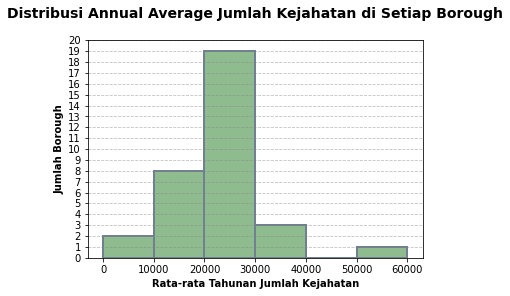

In [11]:
# Membuat list dari unique value pada feature 'year'
year= df_london['year'].unique().tolist() # 2008-2016
year.sort()

# Menghitung total jumlah kejahatan untuk setiap borough
borough_data = df_london.groupby('borough').sum()
borough_data = borough_data['value']

# Menghitung rata-rata tahunan jumlah kejahatan untuk setiap borough
borough_annual_avg = borough_data / len(year)
borough_annual_avg = borough_annual_avg.astype(int)
borough_annual_avg = borough_annual_avg.sort_values()

# Membuat rentang histogram  dari rata-rata borough
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000]
plt.hist(borough_annual_avg, bins=bins, color='darkseagreen', ec='slategrey', lw=2)

# Mengatur label sumbu x dan sumbu y
plt.xlabel('Rata-rata Tahunan Jumlah Kejahatan', fontsize=10, fontweight='bold')
plt.ylabel('Jumlah Borough', fontsize=10, fontweight='bold')

# Mengatur judul plot
plt.title('Distribusi Annual Average Jumlah Kejahatan di Setiap Borough\n', fontsize=14, fontweight='bold')

# Menambahkan grid pada sumbu y
plt.grid(axis='y', which='major', color='gray', linestyle='--', alpha=0.5)

# Mengatur batas dan label pada sumbu y
plt.yticks(range(0, 21))

# Menampilkan plot histogram
plt.show()

**KESIMPULAN**

Dari gambar histogram di atas didapatkan informasi bahwa:
- Terdapat `2 borough` yang memiliki rentang kasus kejahatan antara `0-10000`, 
- Terdapat `8 borough` dengan rentang kasus kejahatan `10000-20000`, 
- Terdapat `19 borough` dengan rentang kasus kejahatan `20000-30000`,
- Terdapat `3 borough` dengan rentang kasus kejahatan `30000-40000`,
- Terdapat `1 borough` dengan rentang kasus kejahatan `50000-60000`.

Jadi total semua borough `di Kota London ada 33 Borough`.

#### **Bar Chart**

Code Review : Mengimplementasikan `Bar Chart` Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.

Analysis : Menarik Informasi/Kesimpulan Berdasarkan Bar Chart Yang Telah Student Buat

Output : Mencari Borough mana yang memiliki angka kejahatan tertinggi di London menggunakan visualisasi bar chart.


C:\Users\Nadiatus Salam\AppData\Local\Temp\ipykernel_2264\291075788.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  location = df_london.groupby('borough').sum()


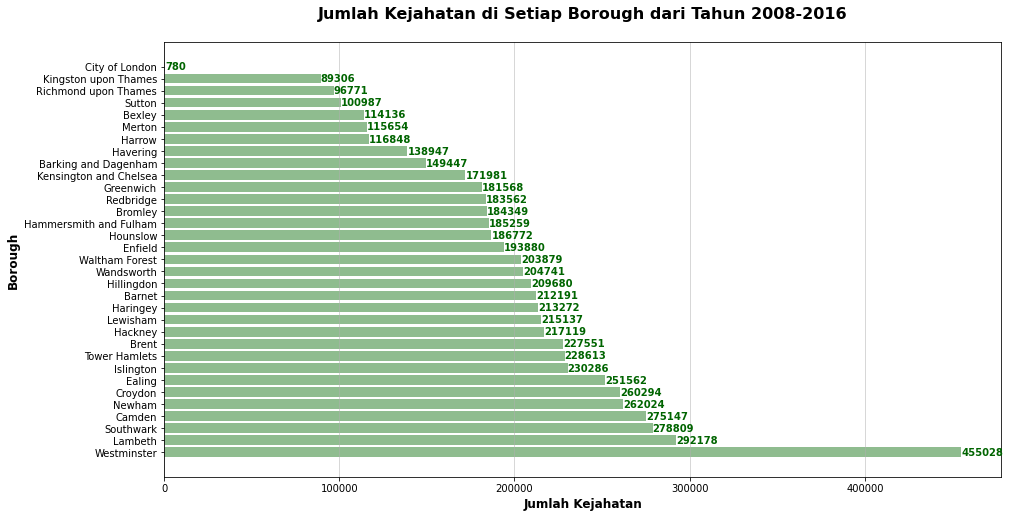

In [12]:
# Mengelompokkan data berdasarkan wilayah (borough) dan menghitung jumlahnya
location = df_london.groupby('borough').sum()
location = location['value']

# Mengurutkan data jumlah kriminal secara menurun
location = location.sort_values(ascending=False)

# Mengambil nilai borough dan jumlah kejahatan
location_plot = location.index.values
jumlah_plot = location

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(15, 8))

# Membuat bar horizontal
bars = ax.barh(location_plot, jumlah_plot, color='darkseagreen')

# Menentukan judul, label sumbu x, dan sumbu y
ax.set_title("Jumlah Kejahatan di Setiap Borough dari Tahun 2008-2016\n", fontsize=16, fontweight='bold')
ax.set_ylabel("Borough", fontsize=12, fontweight='bold')
ax.set_xlabel("Jumlah Kejahatan", fontsize=12, fontweight='bold')

# Menambahkan label nilai pada setiap bar
for i, bar in enumerate(bars):
    ax.text(bar.get_width() + 50, bar.get_y() + bar.get_height() / 2, jumlah_plot[i], va='center', fontweight='bold', color='darkgreen')

# Mengatur rotasi label x agar tidak bertumpuk
plt.setp(ax.get_yticklabels(), rotation=0, ha='right')

# Menambahkan grid pada sumbu x
ax.grid(True, axis='x', linewidth=0.5)

# Menampilkan plot
plt.show()

**KESIMPULAN**

Dapat dilihat dari grafik di atas menampilkan jumlah kasus kriminal dari setiap Borough dari tahun 2008-2016. Borough `Westminster` menjadi kota dengan angka kriminalitas tertinggi di London sepanjang tahun 2008 - 2016 dengan jumlah kasus kriminal sebanyak `455.028 kasus`, bahkan jika dibandingkan dengan borough lain memiliki selisih yang cukup jauh. 

#### **Pie Chart**

Code Review : Mengimplementasikan `Pie Chart` Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.

Analysis : Menarik Informasi/Kesimpulan Berdasarkan Pie Chart Yang Telah Student Buat

Output : Menampilkan jenis kejahatan yang paling dominan di London berdasarkan persentase dari kategori Major menggunakan visualisasi pie chart.

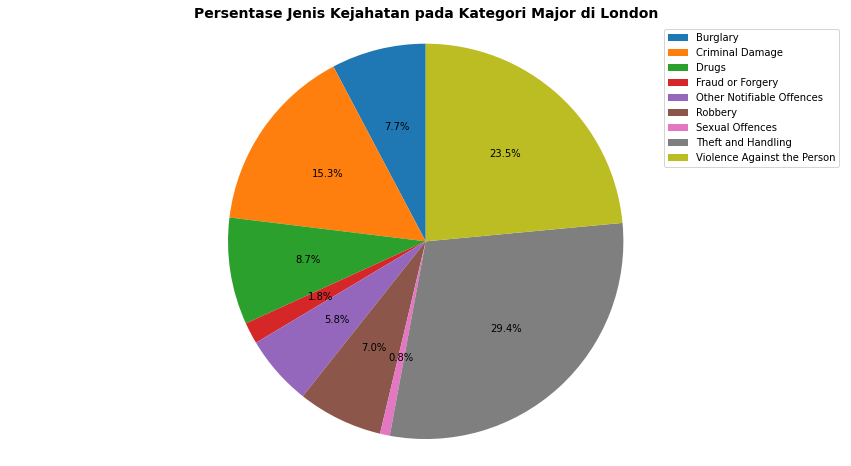

In [13]:
# Menghitung jumlah kejahatan per jenis kejahatan dari kategori major
crime_major_counts = df_london['major_category'].value_counts().sort_index()

# Membuat pie chart
plt.figure(figsize=(15, 8))
plt.pie(crime_major_counts , labels=None, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Jenis Kejahatan pada Kategori Major di London', fontsize=14, fontweight='bold')

# Membuat pie chart terlihat sebagai lingkaran
plt.axis('equal')  

# Menambahkan legenda
plt.legend(labels=crime_major_counts.index, loc='best')

# Menampilkan pie chart
plt.show()

**KESIMPULAN**

Berdasarkan tampilan grafik di atas didapatkan informasi bahwa jenis kejahatan berdasarkan kategori major yang paling tinggi di Kota London merupakan jenis kejahatan `Theft and Handling` dengan `persentase sebesar 29,4%`. Jenis kejahatan ini merujuk pencurian dan penadahan barang. 

Kemudian di urutan kedua terdapat `Violence Against the Person` dengan `persentase sebesar 23,5%`. Jenis kejahatan ini merupakan kejahatan yang melibatkan kekerasan fisik atau ancaman kekerasan terhadap orang lain.

#### **Box Plot**
Code Review : Mengimplementasikan `Box Plot` Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.

Analysis : Menarik Informasi/Kesimpulan Berdasarkan Box Plot Yang Telah Student Buat

Output : Menampilkan bagaimana sebaran data jumlah kejahatan di London berdasarkan tahun dan bulan menggunakan visualisasi box plot.

C:\Users\Nadiatus Salam\AppData\Local\Temp\ipykernel_2264\3323206996.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data = df_london.groupby(['year','month']).sum()


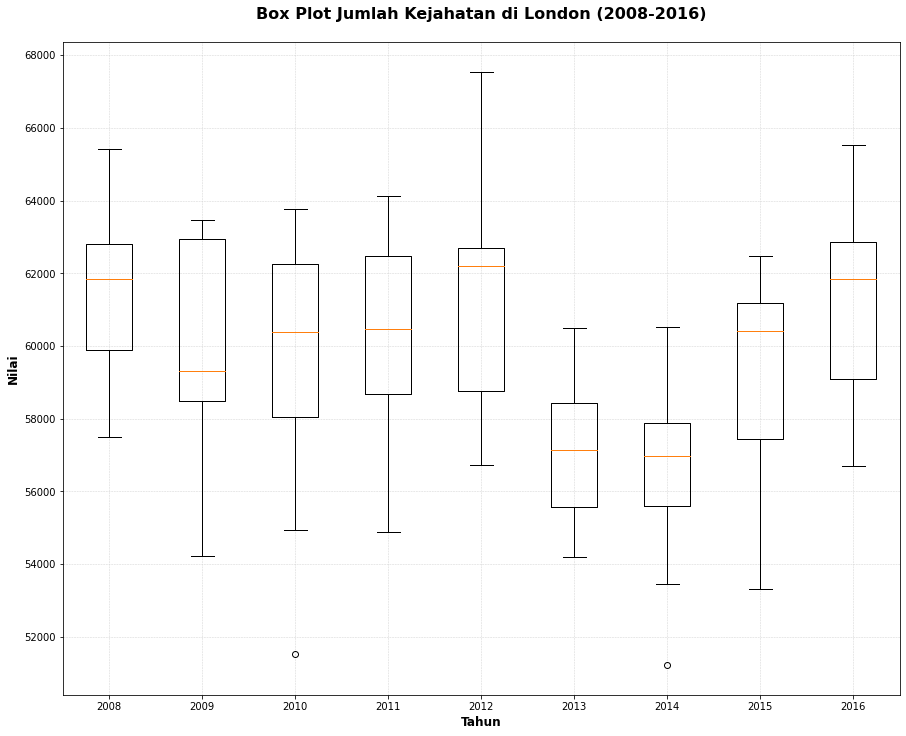

In [22]:
# Mengelompokkan data kejahatan berdasarkan tahun dan bulan, kemudian menjumlahkannya
group_data = df_london.groupby(['year','month']).sum()

# Melakukan proses reshaping data untuk memperoleh tampilan yang sesuai
group_data = group_data.unstack()
group_data = group_data.transpose()

# Membuat box plot dengan matplotlib
plt.figure(figsize=(15, 12))  # Ukuran plot dalam inches
plt.boxplot(group_data.values)

# Mengatur label sumbu x
plt.xticks(range(1, len(group_data.columns) + 1), group_data.columns, rotation=0)

# Mengatur judul dan label sumbu
plt.title("Box Plot Jumlah Kejahatan di London (2008-2016)\n", fontsize=16, fontweight='bold')
plt.xlabel("Tahun", fontsize=12, fontweight='bold')
plt.ylabel("Nilai", fontsize=12, fontweight='bold')

# Menambahkan grid
plt.grid(True, linestyle='dashed', linewidth=0.5, color='lightgray')

# Menampilkan plot box plot
plt.show()

**KESIMPULAN**

Plot di atas menunjukkan tingkat kejahatan di London dari tahun 2008-2016 dengan keterangan gambar sebagai berikut :
* Garis tengah kotak (Second Quartile/Median): Menunjukkan tingkat kejahatan rata-rata di setiap tahun. 
* Tinggi kotak : Menunjukkan rentang interkuartil (IQR). 
* Titik bulat : Menunjukkan outlier.

Plot kotak menunjukkan bahwa tingkat kejahatan di London meningkat dari tahun 2008 hingga 2016. Tingkat kejahatan rata-rata pada tahun `2008 adalah 100`, sedangkan tingkat kejahatan rata-rata pada tahun `2016 adalah 120`. 

IQR pada tahun `2008 adalah 20`, sedangkan IQR pada tahun `2016 adalah 30`. Ini artinya penyebaran `tingkat kejahatan di London meningkat dari tahun 2008 hingga 2016`.

Sedangkan `outliernya sebesar 140 dan 160`. Outlier ini mewakili tingkat kejahatan tertinggi di London pada tahun 2016 dan 2008. Outlier ini penting untuk diperhatikan karena menunjukkan bahwa ada beberapa tahun di mana tingkat kejahatan di London secara signifikan lebih tinggi daripada tingkat kejahatan rata-rata. Secara keseluruhan, plot kotak menunjukkan bahwa tingkat kejahatan di London telah meningkat dari tahun 2008 hingga 2016.

### **Scatter Plot**
Code Review : Mengimplementasikan `Scatter Plot` Menggunakan `Matplotlib` Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.

Analysis : Menarik Informasi/Kesimpulan Berdasarkan Scatter Plot Yang Telah Student Buat

Output : Menampilkan bagaimana tingkat kejahatan di Kota London dari tahun 2008 hingga 2016 yang dibagi berdasarkan kategori kejahatan utama menggunakan visualisasi scatter plot.

In [15]:
# Membuat dataframe baru dengan mengcopy
london_crime = df_london.copy()

# Menggabungkan kolom 'year' dan 'month' menjadi kolom 'series' dengan tipe data datetime
london_crime['series'] = pd.to_datetime(london_crime['year'].astype(str) + "-" + london_crime['month'].astype(str))

# Mengurutkan DataFrame berdasarkan kolom 'series' secara ascending (terkecil ke terbesar)
london_crime = london_crime.sort_values('series', ascending=True)

# Menghapus kolom 'minor_category', 'year', dan 'month' dari DataFrame
london_crime = london_crime.drop(['minor_category', 'year', 'month'], axis=1)

# Filter data untuk borough 'City of London'
london_crime = london_crime[london_crime['borough'] == 'City of London']

# Menghapus kolom 'borough' dari DataFrame
london_crime = london_crime.drop('borough', axis=1)

# Mengelompokkan data berdasarkan kolom 'series' dan 'major_category', kemudian menjumlahkan nilai 'value'
london_crime = london_crime.groupby(['series', 'major_category'])['value'].sum().reset_index()

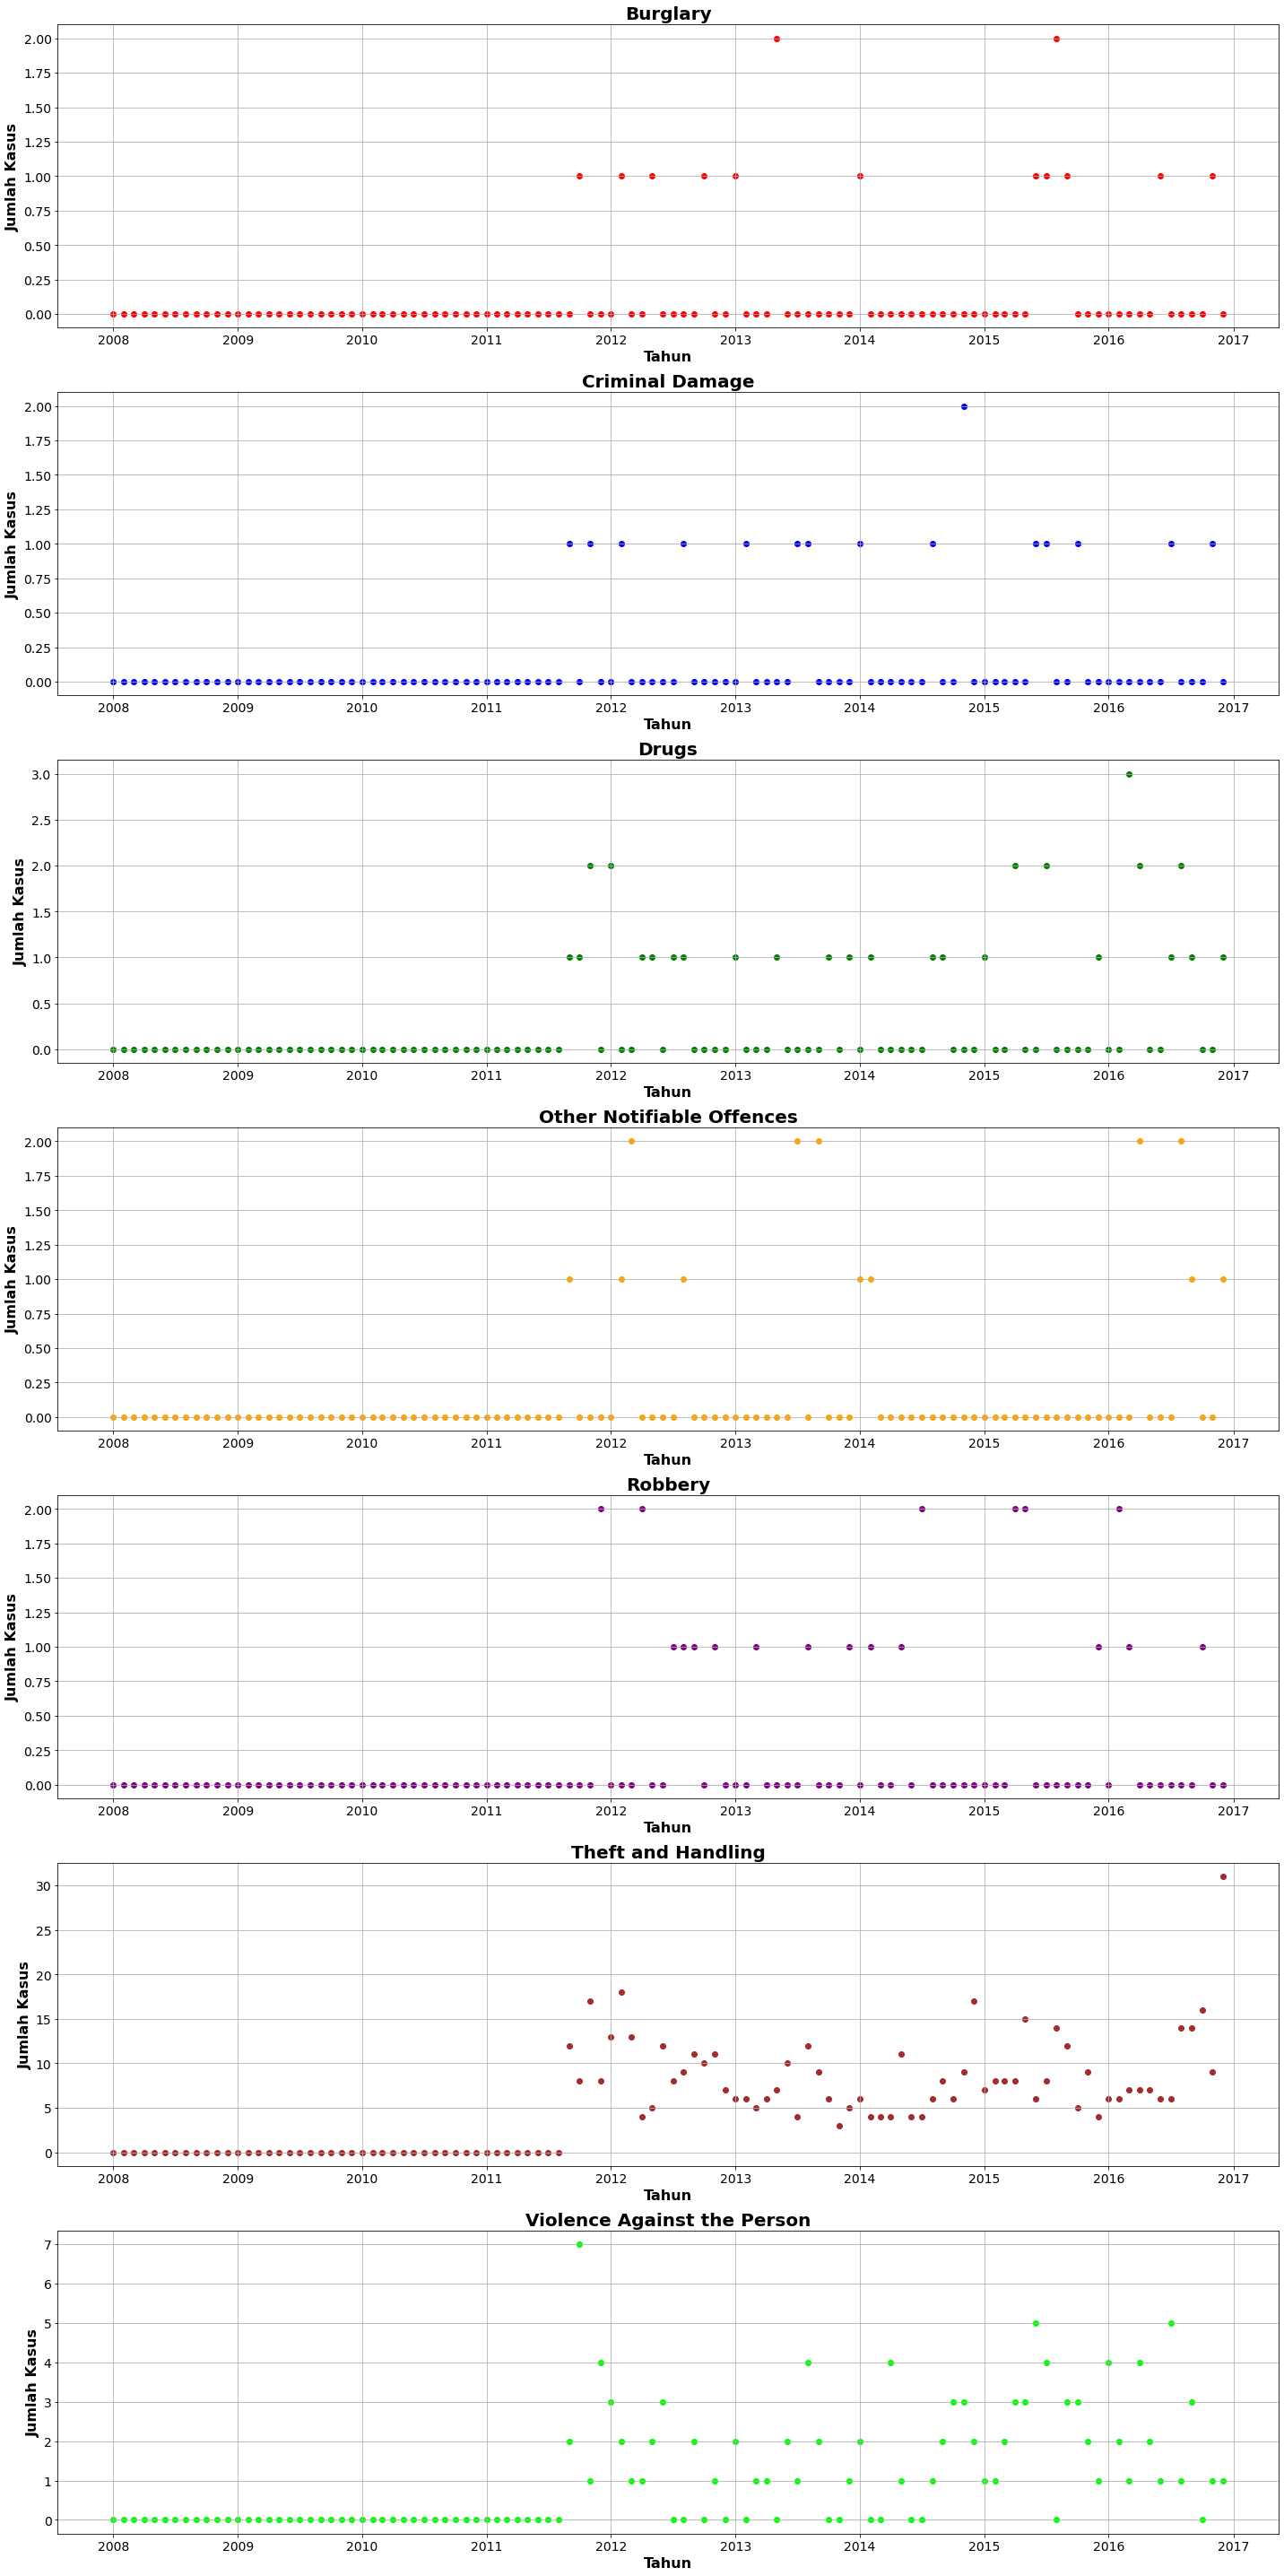

In [16]:
# Membuat contoh dataframe dengan kolom 'kategori', 'kolom_x', dan 'kolom_y'
data = {
    'kategori': london_crime['major_category'],
    'kolom_x': london_crime['series'],
    'kolom_y': london_crime['value']
}
dataframe = pd.DataFrame(data)

# Mengambil kategori major_category unik dari dataframe
categories = dataframe['kategori'].unique()

# Mengatur jumlah baris dan kolom subplot sesuai dengan jumlah kategori
num_rows = len(categories)
num_cols = 1

# Mengatur ukuran keseluruhan gambar (figure)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'lime']

# Membuat scatter plot untuk setiap major_category
for i, category in enumerate(categories):
    # Mengambil data untuk major_category tertentu
    data = dataframe[dataframe['kategori'] == category]
    
    # Menentukan indeks kolom subplot
    col = i
    
    # Membuat scatter plot pada subplot yang sesuai
    axes[col].scatter(data['kolom_x'], data['kolom_y'], color=colors[i % len(colors)], label=category)
    
    # Menambahkan judul pada subplot
    axes[col].set_title(category, fontsize=20, fontweight='bold')
    
    # Memberikan label pada sumbu x dan y
    axes[col].set_xlabel('Tahun', fontsize=16, fontweight='bold')
    axes[col].set_ylabel('Jumlah Kasus', fontsize=16, fontweight='bold')
    
    # Mengatur ukuran font tick pada sumbu x dan y
    axes[col].tick_params(axis='x', labelsize=14)
    axes[col].tick_params(axis='y', labelsize=14)
    
    # Menampilkan grid
    axes[col].grid(True)

# Mengatur tata letak subplot agar tidak tumpang tindih
fig.tight_layout()

# Menampilkan gambar (figure) dengan semua subplot
plt.show()

**KESIMPULAN**

Scatter Plot di atas menunjukkan tingkat kejahatan di Kota London dari tahun 2008 hingga 2016, dibagi berdasarkan kategori kejahatan utama (major). Sumbu `x menunjukkan tahun`, dan sumbu `y menunjukkan jumlah kasus`.

Plot sebaran di atas menunjukkan bahwa tingkat kejahatan di Kota London meningkat dari tahun 2008 sampai tahun 2016. Dapat dilihat untuk `peningkatan paling signifikan terjadi pada kategori "Violence Against the Person"` yang meningkat lebih dari dua kali lipat sejak tahun 2008. Kategori lainnya juga mengalami peningkatan tingkat kejahatan, namun peningkatannya tidak sesignifikan seperti pada kategori "Violence Against the Person".

1. Kategori `Burglary` (kejahatan seperti membobol rumah dan bisnis)
Kategori ini juga mengalami peningkatan tingkat kejahatan di Kota London dari tahun 2008 hingga 2016. Jumlah kasus dalam kategori ini telah `meningkat sekitar 50% sejak tahun 2008`.

2. Kategori `Criminal Damage` (kejahatan seperti tindak perusakan dan pembakaran). 
Kategori ini mengalami penurunan yang relatif kecil dalam tingkat kejahatan di Kota London dari tahun 2008 hingga 2016. Jumlah kasus dalam kategori ini telah `menurun sekitar 10% sejak tahun 2008`.

3. Kategori `Theft and Handling` (kejahatan seperti mengutil, pencopetan, dan pencurian mobil). Kategori ini mengalami peningkatan yang relatif kecil dalam tingkat kejahatan di Kota London dari tahun 2008 hingga 2016. Jumlah kasus dalam kategori ini telah `meningkat sekitar 20% sejak tahun 2008`.

4. Kategori `Violence Against the Person` (kejahatan seperti penyerangan, perampokan, dan pembunuhan). 
Kategori ini mengalami peningkatan paling signifikan dalam tingkat kejahatan di Kota London dari tahun 2008 hingga 2016. Jumlah kasus dalam kategori ini `meningkat lebih dari dua kali lipat sejak tahun 2008`.

5. Kategori lainnya seperti `pelanggaran narkoba, pelanggaran ketertiban umum, dan penipuan`. Kategori ini mengalami peningkatan yang relatif kecil dalam tingkat kejahatan di Kota London dari tahun 2008 hingga 2016. Jumlah kasus dalam kategori ini telah `meningkat sekitar 15% sejak tahun 2008`.

#### **Word Clouds**

Code Review : Mengimplementasikan `Word Clouds` Menggunakan `Wordclouds` Library Dengan Data Yang Relevan Dan Sesuai Dengan Kegunaan Plot/Grafik.

Output : Menampilkan jenis kejahatan apa yang paling banyak terjadi di London berdasarkan minor_category menggunakan visualisasi word clouds.


In [17]:
# Melakukan pengelompokan berdasarkan minor_category dan menjumlahkan nilai-nilai lainnya
london_crime = df_london.groupby('minor_category').sum().reset_index()

# Menghapus kolom 'year' dan 'month' dari dataframe
london_crime = london_crime.drop(['year', 'month'], axis=1)

# Mengurutkan dataframe berdasarkan kolom 'value' secara menurun
london_crime.sort_values('value', ascending=False)

C:\Users\Nadiatus Salam\AppData\Local\Temp\ipykernel_2264\337241370.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  london_crime = df_london.groupby('minor_category').sum().reset_index()


minor_category   value
21                             Other Theft  980085
27                Theft From Motor Vehicle  569956
2                   Burglary in a Dwelling  491282
12                              Harassment  458124
0                      Assault with Injury  451001
25                     Possession Of Drugs  431948
4                           Common Assault  413690
28                        Theft From Shops  345142
22                      Other Theft Person  308842
7         Criminal Damage To Motor Vehicle  265463
1              Burglary in Other Buildings  263011
24                       Personal Property  237578
29           Theft/Taking Of Motor Vehicle  216538
30             Theft/Taking of Pedal Cycle  168974
6              Criminal Damage To Dwelling  154116
16                   Other Criminal Damage  145356
31                            Wounding/GBH  125556
19                        Other Notifiable  100819
23                          Other violence   70778
8        Criminal Damage To Other Building   66003
13  Motor Vehicle Interference & Tampering   56224
15                        Offensive Weapon   37983
9                         Drug Trafficking   35819
3                        Business Property   21295
11                   Handling Stolen Goods   16100
10                          Going Equipped    5530
5                       Counted per Victim    3840
17                             Other Drugs    2998
18                   Other Fraud & Forgery    1485
20                            Other Sexual    1005
14                                  Murder     949
26                                    Rape     268

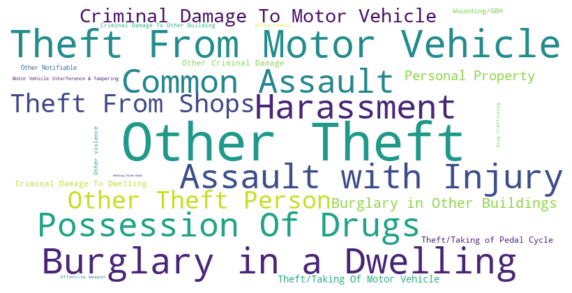

In [18]:
# Membuat dictionary berdasarkan kolom 'minor_category' sebagai kunci dan kolom 'value' sebagai nilai
data_dict = dict(zip(london_crime['minor_category'], london_crime['value']))

# Membuat objek WordCloud dengan ukuran kata berdasarkan nilai pada dictionary
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data_dict)

# Menampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')

# Menghilangkan sumbu x dan y pada plot
plt.axis('off')

# Menampilkan plot WordCloud
plt.show()

**KESIMPULAN**

Dari gambar Word Clouds di atas ditampilkan jenis-jenis kejahatan di London. Untuk `ukuran tulisan yang semakin besar menunjukkan bahwa jumlah kasus semakin besar juga`. Diketahui dari gambar tersebut bahwa `jenis kejahatan yang sering terjadi di London adalah jenis kejahatan pencurian (Theft)`, mulai dari pencurian kendaraan bermotor, pencurian toko, dan pencurian lainnya. Kata-kata terbesar dalam Word Clouds adalah `Theft` dan `Violence Against the Person`. Hal ini menunjukkan bahwa ini merupakan 2 jenis kejahatan yang paling umum terjadi di London. Adapun jenis kejahatan yang juga sering terjadi adalah `penyerangan, perampokkan, narkoba, dan pelecehan`.

#### **Folium**

Code Review : Mengimplementasikan London Maps Menggunakan `Folium`.

Output : Menampilkan tingkat kejahatan di Kota London dari tahun 2008 hingga 2016, dibagi berdasarkan kategori kejahatan utama menggunakan visualisasi Folium.

In [19]:
# Mengelompokkan data berdasarkan kolom 'borough' dan menjumlahkan nilai
london_crime = df_london.groupby('borough').sum()

# Menghapus kolom 'year' dan 'month', kemudian mereset index
london_crime = london_crime.drop(['year', 'month'], axis=1).reset_index()

# Memuat data geojson London Boroughs
world_geo = 'london_boroughs.json'

# Membuka file geojson dan memuat datanya
with open(world_geo) as f:
    data = json.load(f)

# Menambahkan informasi jumlah kasus ke geojson
for i in range(33):
    # Mendapatkan nama borough dari geojson
    a = data['features'][i]['properties']['name']
    
    # Melakukan iterasi pada dataframe london_crime
    for x, y in london_crime.iterrows():
        borough = y['borough']
        kasus = y['value']
        
        # Jika nama borough pada geojson sesuai dengan nama borough pada dataframe maka tambahkan informasi jumlah kasus pada geojson
        if a == borough:
            data['features'][i]['properties']['kasus'] = kasus

# Menyimpan hasil perubahan pada file JSON baru
with open('file.json', 'w') as f:
    json.dump(data, f)


C:\Users\Nadiatus Salam\AppData\Local\Temp\ipykernel_2264\1698367414.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  london_crime = df_london.groupby('borough').sum()


In [20]:
# load GeoJSON file
world_geo = 'file.json'

# Membuat peta dunia sederhana dengan menggunakan folium
world_map = folium.Map(location=[51.5074, -0.1278], zoom_start=10, tiles='CartoDB Positron')

# Menambahkan choropleth layer ke peta
world_map.choropleth(
    geo_data=world_geo,  # Data geojson
    data=london_crime,  # Data jumlah kasus kejahatan
    columns=['borough', 'value'],  # Kolom pada data yang akan digunakan
    key_on='properties.name',  # Kunci pencocokan pada geojson
    fill_color='Paired',  # Warna yang akan digunakan https://gist.github.com/chule/9adb570be90b1b3d7006
    fill_opacity=0.7,  # Opasitas pengisian
    line_opacity=1,  # Opasitas garis batas
    legend_name='Jumlah Kasus Kejahatan'  # Nama legenda
)

# Menambahkan layer GeoJSON ke peta
folium.GeoJson(
    world_geo,
    tooltip=folium.GeoJsonTooltip(
        fields=['name', 'area_hectares', 'kasus'],
        aliases=['Borough: ', 'Luas area (Ha): ', 'Jumlah: ']
    ),
    style_function=lambda feature: {
        'weight': 1,
        'color': 'black',
        'fillOpacity': 0
    }
).add_to(world_map)

# Menampilkan peta
world_map

C:\Users\Nadiatus Salam\AppData\Roaming\Python\Python310\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


**KESIMPULAN**

Berdasarkan gambar Choropleth Maps di atas, ditunjukkan bahwa Borough Westminster memiliki warna merah yang menunjukkan bahwa area itu memiliki jumlah kasus kriminal yang terbilang banyak, kemudian area dengan warna orange memiliki jumlah kasus kriminal yang terbilang sedang, dan area berwarna kuning relatif memiliki kasus kriminal yang sedikit.

Berdasarkan gambar di atas dapat diambil informasi bahwa `Westminster` memiliki `warna merah` yang menandakan bahwa area tersebut memiliki jumlah kasus `kriminal tinggi`, sedangkan untuk area yang berwarna `hijau tua dan muda` memiliki jumlah kasus `kriminal sedang`, dan untuk area yang berwarna `biru` relatif memiliki kasus kriminal `sedikit`.

In [21]:
# Ambil nilai luasan dan jumlahKasus
luasan = [feature['properties']['area_hectares'] for feature in data['features']]
jumlahKasus = [feature['properties']['kasus'] for feature in data['features']]

# Hitung koefisien korelasi
correlation = np.corrcoef(luasan, jumlahKasus)

# Tampilkan hasil
print("Koefisien Korelasi: \n", correlation[0, 1])

Koefisien Korelasi: 
 -0.08488923685534233


Apakah luasan area dari Borough mempengaruhi jumlah kasus kriminal di area tersebut ?

**KESIMPULAN**

Berdasarkan hasil korelasi antara jumlah kasus dan luas area, didapatkan `koefisien korelasi -0.085` yang mana nilai ini sangat kecil bahkan mendekati 0. Artinya `tidak ada korelasi atau hubungan antara jumlah kasus dan luasan area dari setiap Borough`.